# TP 03 - Vision por Computadoras I

**Alumno**: Matias Tripode

# Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

### 1) Obtener una detección del logo en cada imagen sin falsos positivos

- Utilizar alguna métrica para filtrar solapamiento entre detecciones muy cercanas (IoU, NMS, etc…).
- Hacer un análisis exploratorio y elegir la métrica de apropiada.
- Pre-procesar el template y/o las imágenes para reducir la información a correlacionar (canny, pirámides, etc…).
- La correlación puede dar un falso positivo si se aplica a áreas de mucha intensidad ej: zonas blancas.
- La suma de diferencias puede llevar a resultados erróneos si la imagen tiene zonas de baja intensidad.

In [54]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [55]:
def aplicar_template_a_image(img_rgb, template):
    h, w = template.shape[:2]
    # Los 6 métodos posibles para comparación:
    methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
                'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

    # Definir escalas para la pirámide
    scales = np.linspace(0.5, 2.0, 10)

    for meth in methods:
        # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
        img_salida = img_rgb.copy()
        
        for scale in scales:
            # Redimensionar la imagen a cada escala
            resized = cv.resize(img_rgb, None, fx=scale, fy=scale, interpolation=cv.INTER_LINEAR)
            r = img_rgb.shape[1] / float(resized.shape[1])  # relación para volver a tamaño original

            # Saltar si la imagen es más chica que la plantilla
            if resized.shape[0] < h or resized.shape[1] < w:
                # print(f'Saltar si la imagen ({resized.shape}) es más chica que la plantilla ({template.shape})')
                continue
            else:
                print(f'Usar la imagen ({resized.shape}) que es mas grande que la plantilla ({template.shape})')

            method = eval(meth)       
            # Aplicamos la coincidencia de patrones
            #--------------------------------------
            res = cv.matchTemplate(resized, template, method)
            
            # Encontramos los valores máximos y mínimos
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
            
            # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
            if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
                top_left = min_loc
            else:
                top_left = max_loc

            # Marcamos el lugar donde lo haya encontrado
            #----------------------------------------
            bottom_right = (top_left[0] + w, top_left[1] + h)
            cv.rectangle(img_salida,top_left, bottom_right, (0, 255, 0), 2)

            # Graficamos el procesamiento y la salida
            #----------------------------------------
            plt.figure()
            
            # Resultado de coincidencia
            plt.subplot(121),plt.imshow(res,cmap = 'gray')
            plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
            
            # Imagen original con recuadros
            plt.subplot(122),plt.imshow(img_salida)
            plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
            
            plt.suptitle(meth)
            plt.show()

Usar la imagen ((329, 477, 3)) que es mas grande que la plantilla ((175, 400, 3))


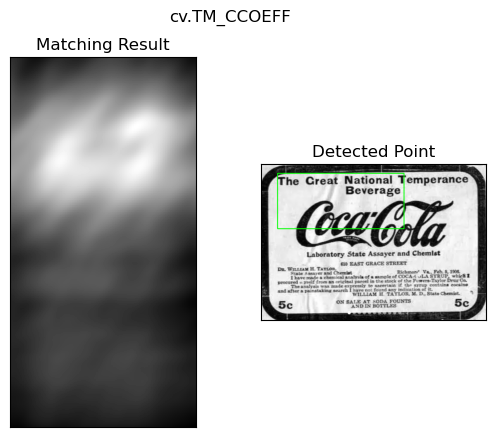

Usar la imagen ((411, 596, 3)) que es mas grande que la plantilla ((175, 400, 3))


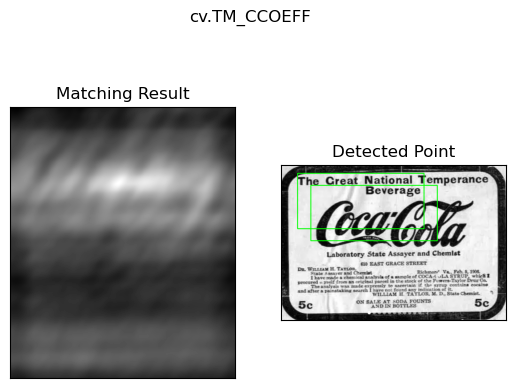

Usar la imagen ((493, 715, 3)) que es mas grande que la plantilla ((175, 400, 3))


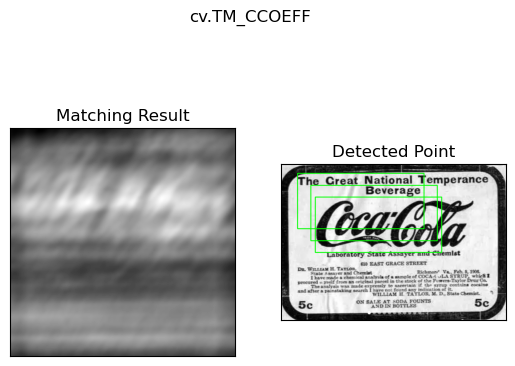

Usar la imagen ((575, 834, 3)) que es mas grande que la plantilla ((175, 400, 3))


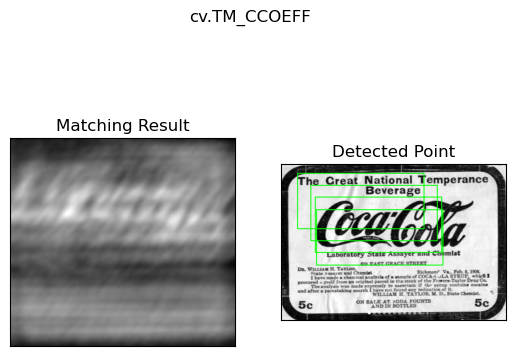

Usar la imagen ((657, 953, 3)) que es mas grande que la plantilla ((175, 400, 3))


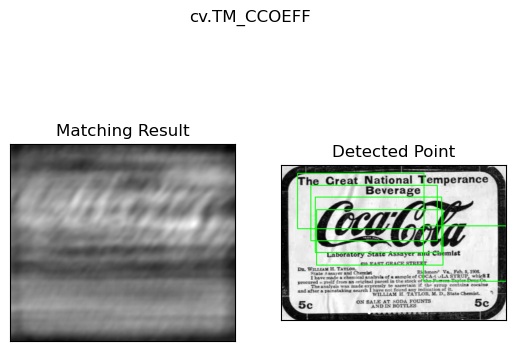

Usar la imagen ((740, 1072, 3)) que es mas grande que la plantilla ((175, 400, 3))


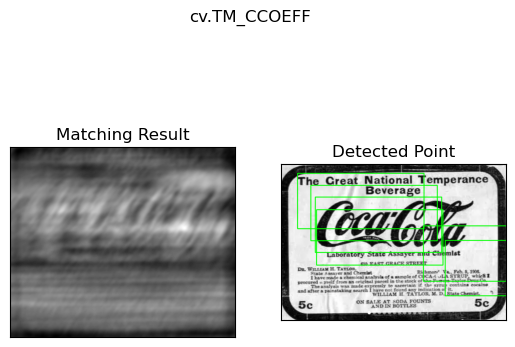

Usar la imagen ((822, 1192, 3)) que es mas grande que la plantilla ((175, 400, 3))


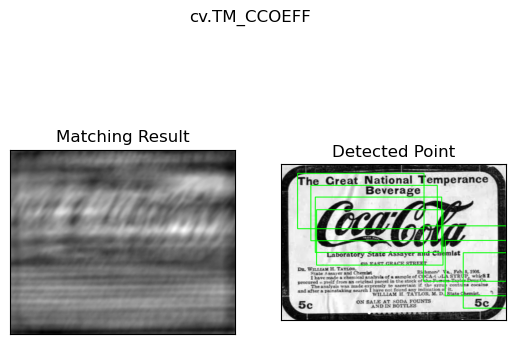

Usar la imagen ((904, 1311, 3)) que es mas grande que la plantilla ((175, 400, 3))


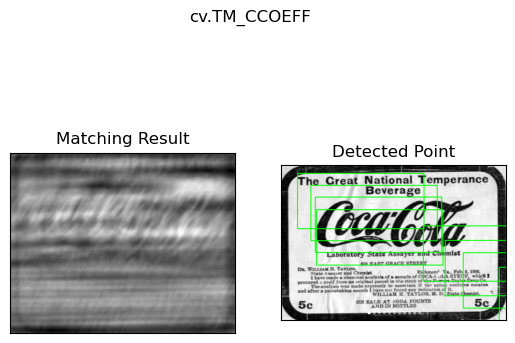

Usar la imagen ((986, 1430, 3)) que es mas grande que la plantilla ((175, 400, 3))


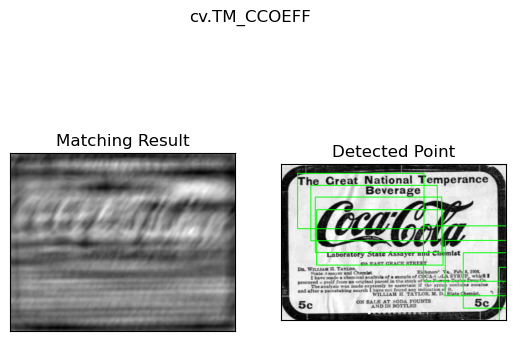

Usar la imagen ((329, 477, 3)) que es mas grande que la plantilla ((175, 400, 3))


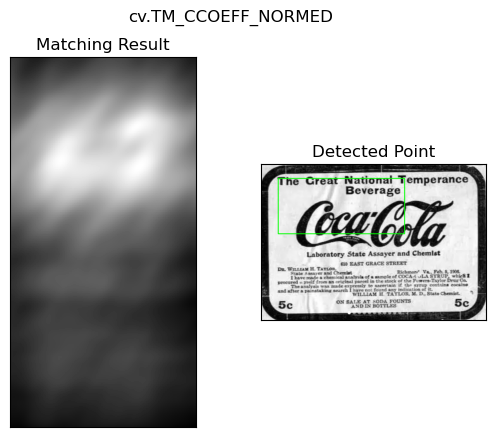

Usar la imagen ((411, 596, 3)) que es mas grande que la plantilla ((175, 400, 3))


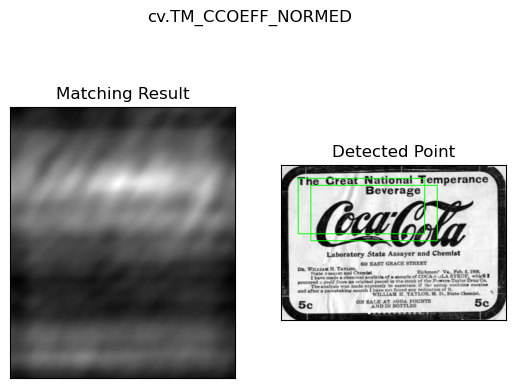

Usar la imagen ((493, 715, 3)) que es mas grande que la plantilla ((175, 400, 3))


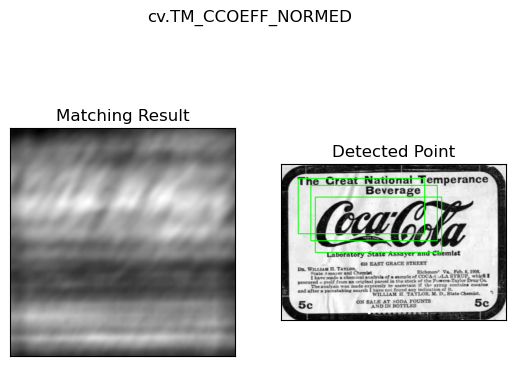

Usar la imagen ((575, 834, 3)) que es mas grande que la plantilla ((175, 400, 3))


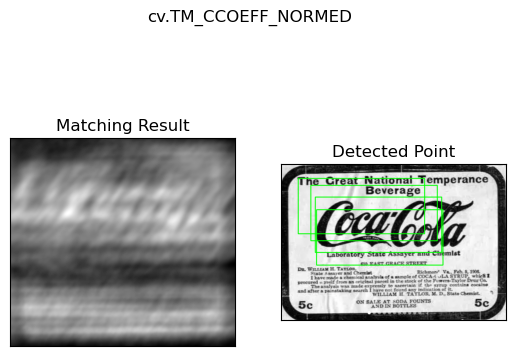

Usar la imagen ((657, 953, 3)) que es mas grande que la plantilla ((175, 400, 3))


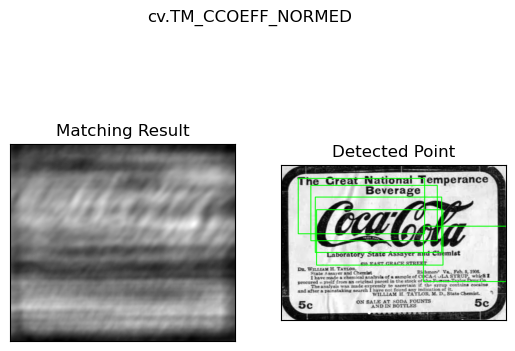

Usar la imagen ((740, 1072, 3)) que es mas grande que la plantilla ((175, 400, 3))


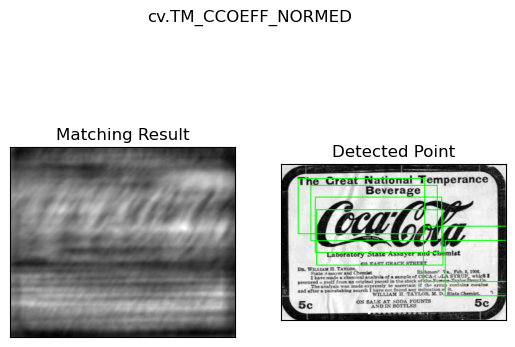

Usar la imagen ((822, 1192, 3)) que es mas grande que la plantilla ((175, 400, 3))


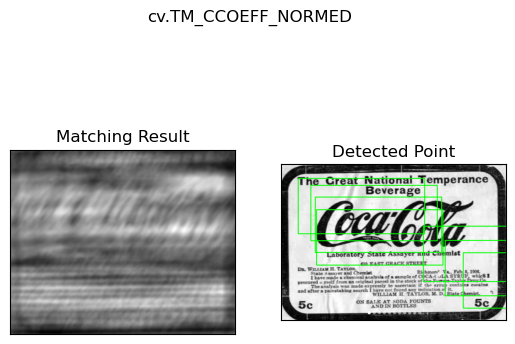

Usar la imagen ((904, 1311, 3)) que es mas grande que la plantilla ((175, 400, 3))


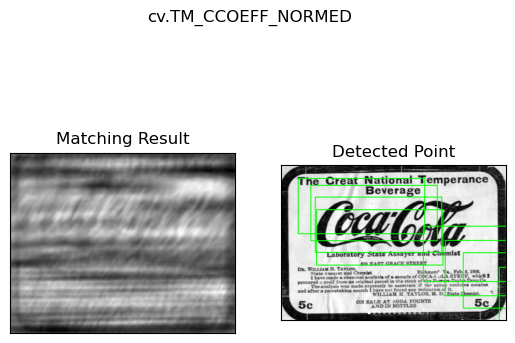

Usar la imagen ((986, 1430, 3)) que es mas grande que la plantilla ((175, 400, 3))


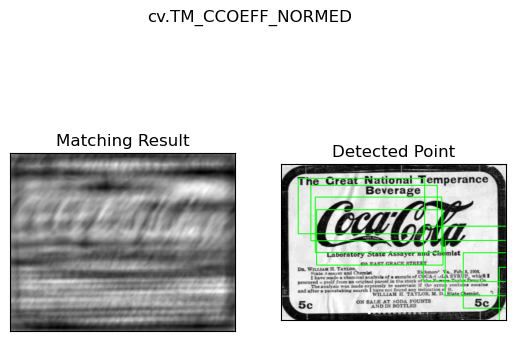

Usar la imagen ((329, 477, 3)) que es mas grande que la plantilla ((175, 400, 3))


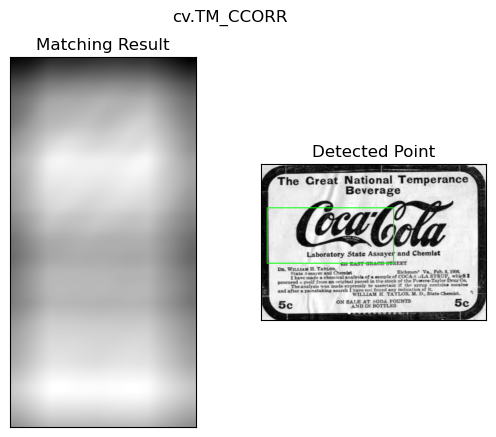

Usar la imagen ((411, 596, 3)) que es mas grande que la plantilla ((175, 400, 3))


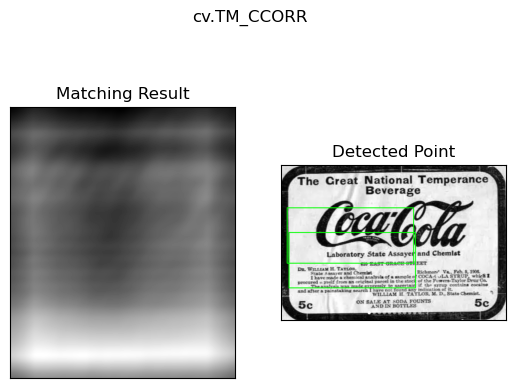

Usar la imagen ((493, 715, 3)) que es mas grande que la plantilla ((175, 400, 3))


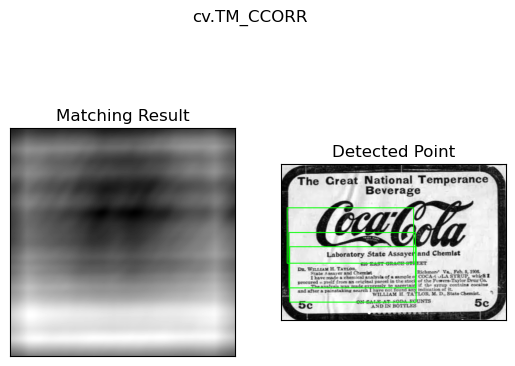

Usar la imagen ((575, 834, 3)) que es mas grande que la plantilla ((175, 400, 3))


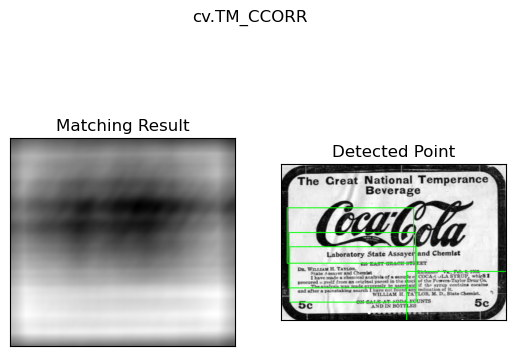

Usar la imagen ((657, 953, 3)) que es mas grande que la plantilla ((175, 400, 3))


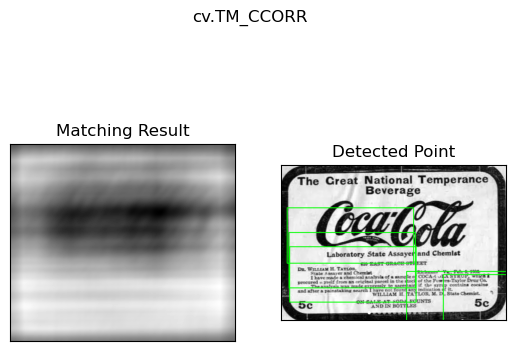

Usar la imagen ((740, 1072, 3)) que es mas grande que la plantilla ((175, 400, 3))


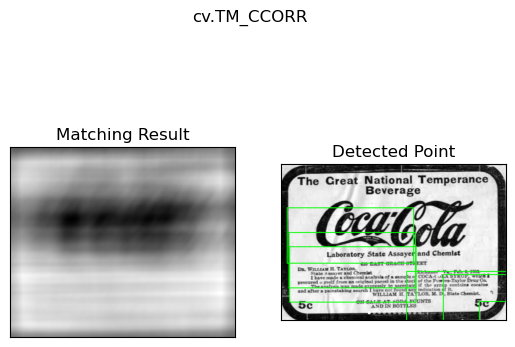

Usar la imagen ((822, 1192, 3)) que es mas grande que la plantilla ((175, 400, 3))


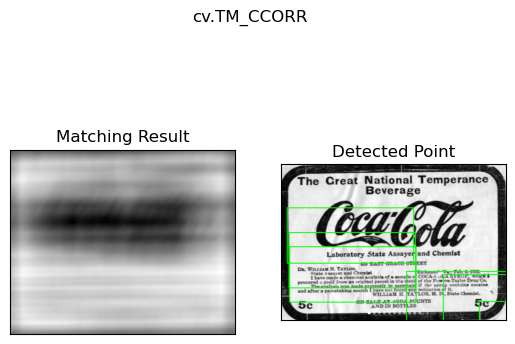

Usar la imagen ((904, 1311, 3)) que es mas grande que la plantilla ((175, 400, 3))


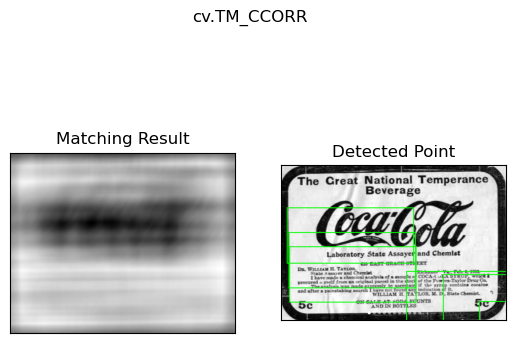

Usar la imagen ((986, 1430, 3)) que es mas grande que la plantilla ((175, 400, 3))


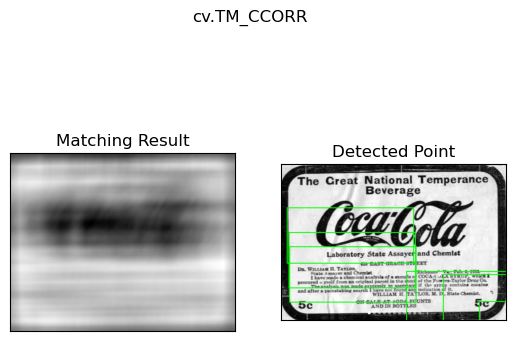

Usar la imagen ((329, 477, 3)) que es mas grande que la plantilla ((175, 400, 3))


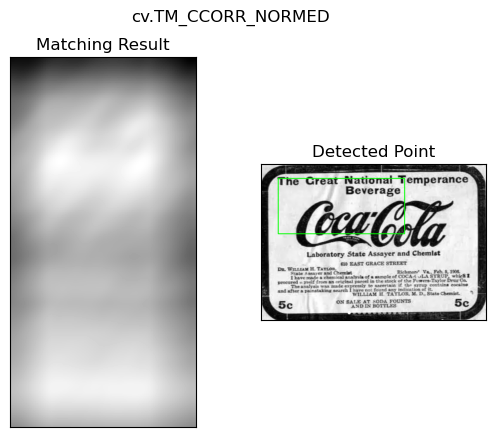

Usar la imagen ((411, 596, 3)) que es mas grande que la plantilla ((175, 400, 3))


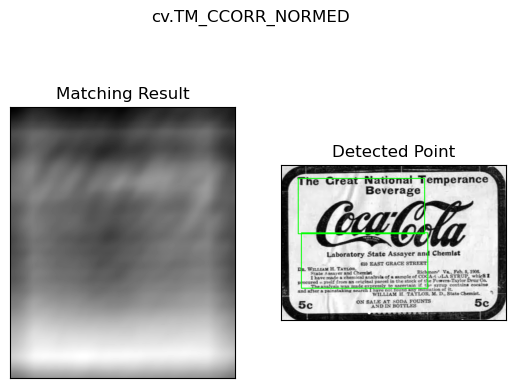

Usar la imagen ((493, 715, 3)) que es mas grande que la plantilla ((175, 400, 3))


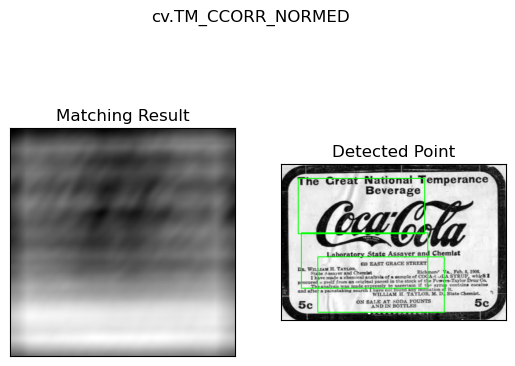

Usar la imagen ((575, 834, 3)) que es mas grande que la plantilla ((175, 400, 3))


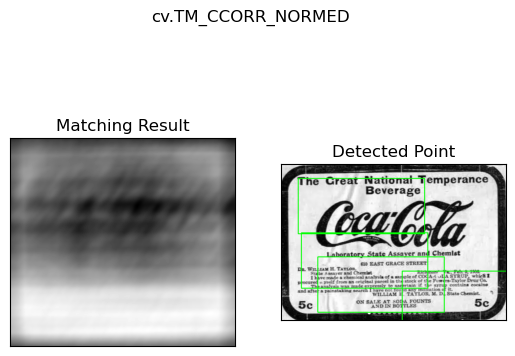

Usar la imagen ((657, 953, 3)) que es mas grande que la plantilla ((175, 400, 3))


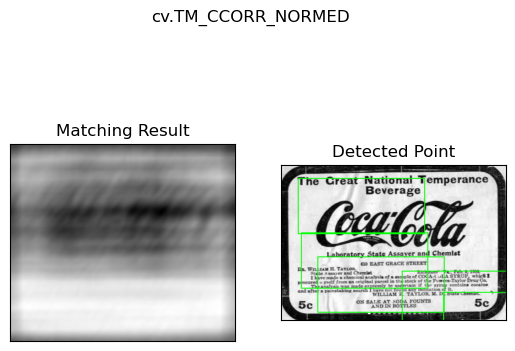

Usar la imagen ((740, 1072, 3)) que es mas grande que la plantilla ((175, 400, 3))


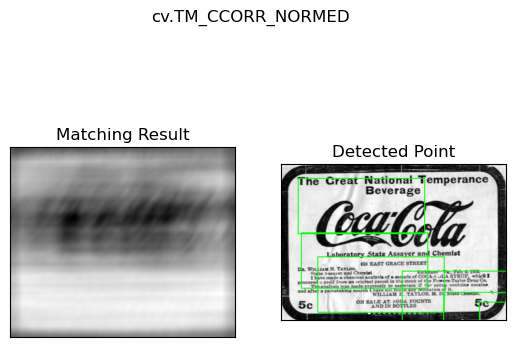

Usar la imagen ((822, 1192, 3)) que es mas grande que la plantilla ((175, 400, 3))


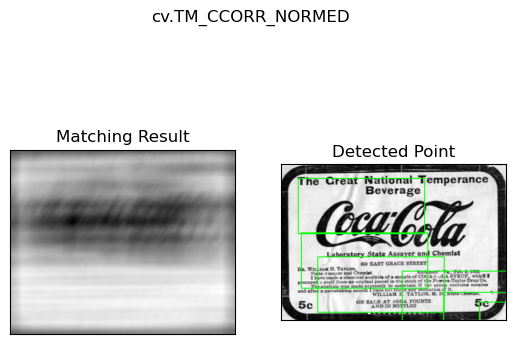

Usar la imagen ((904, 1311, 3)) que es mas grande que la plantilla ((175, 400, 3))


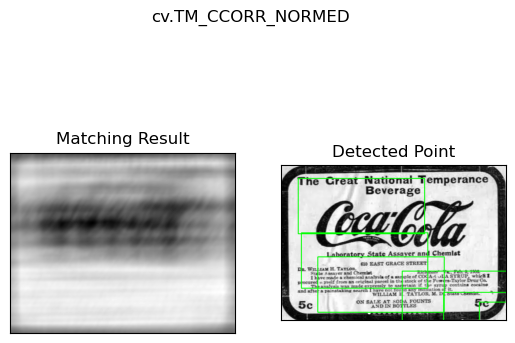

Usar la imagen ((986, 1430, 3)) que es mas grande que la plantilla ((175, 400, 3))


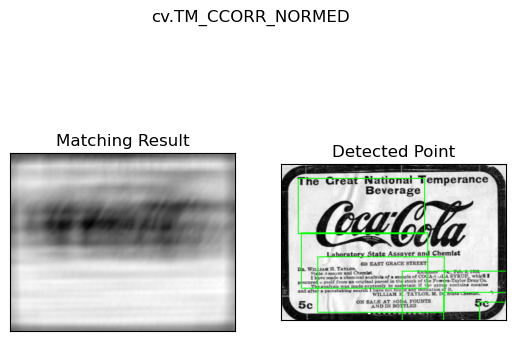

Usar la imagen ((329, 477, 3)) que es mas grande que la plantilla ((175, 400, 3))


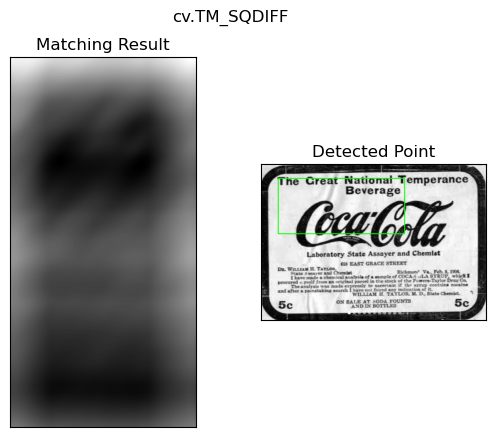

Usar la imagen ((411, 596, 3)) que es mas grande que la plantilla ((175, 400, 3))


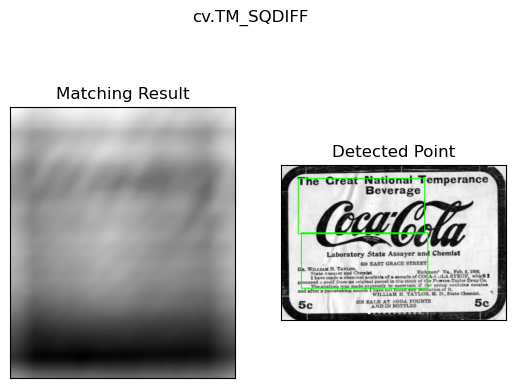

Usar la imagen ((493, 715, 3)) que es mas grande que la plantilla ((175, 400, 3))


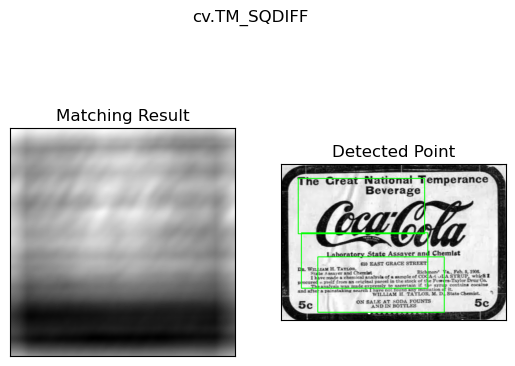

Usar la imagen ((575, 834, 3)) que es mas grande que la plantilla ((175, 400, 3))


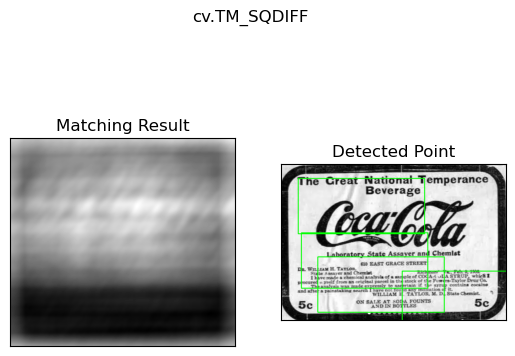

Usar la imagen ((657, 953, 3)) que es mas grande que la plantilla ((175, 400, 3))


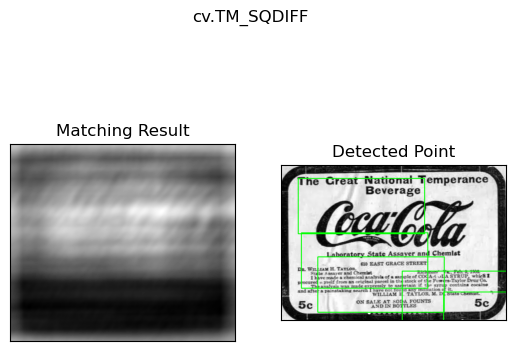

Usar la imagen ((740, 1072, 3)) que es mas grande que la plantilla ((175, 400, 3))


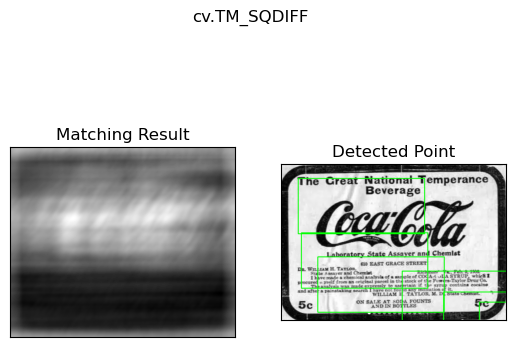

Usar la imagen ((822, 1192, 3)) que es mas grande que la plantilla ((175, 400, 3))


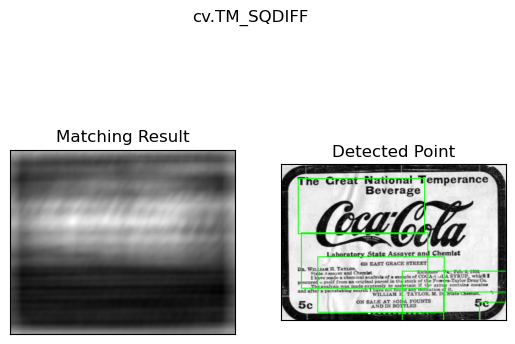

Usar la imagen ((904, 1311, 3)) que es mas grande que la plantilla ((175, 400, 3))


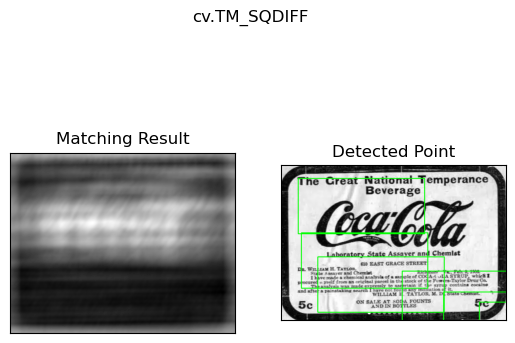

Usar la imagen ((986, 1430, 3)) que es mas grande que la plantilla ((175, 400, 3))


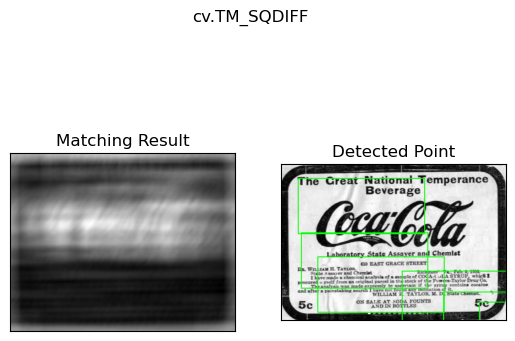

Usar la imagen ((329, 477, 3)) que es mas grande que la plantilla ((175, 400, 3))


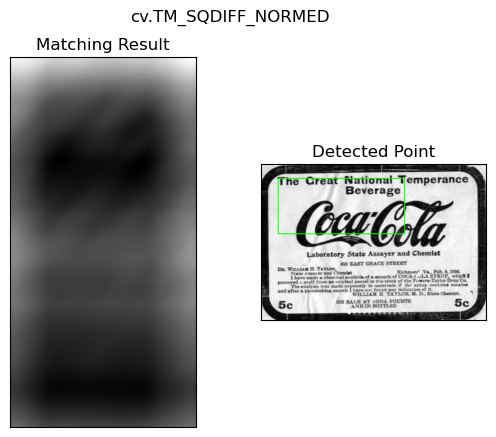

Usar la imagen ((411, 596, 3)) que es mas grande que la plantilla ((175, 400, 3))


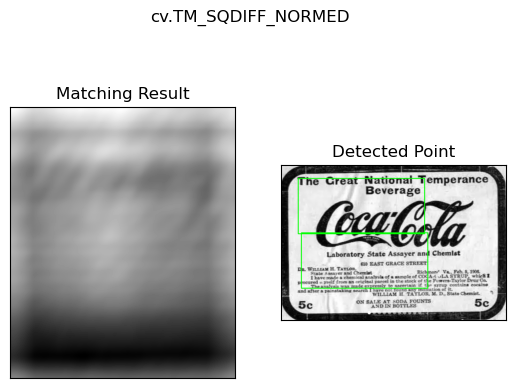

Usar la imagen ((493, 715, 3)) que es mas grande que la plantilla ((175, 400, 3))


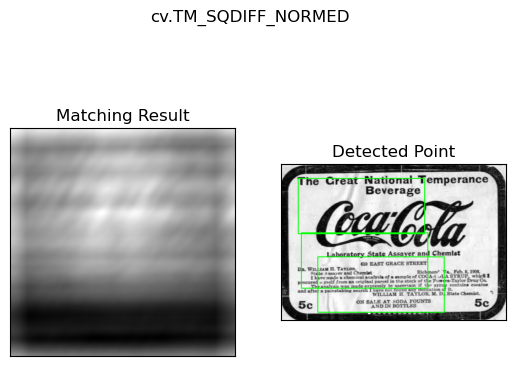

Usar la imagen ((575, 834, 3)) que es mas grande que la plantilla ((175, 400, 3))


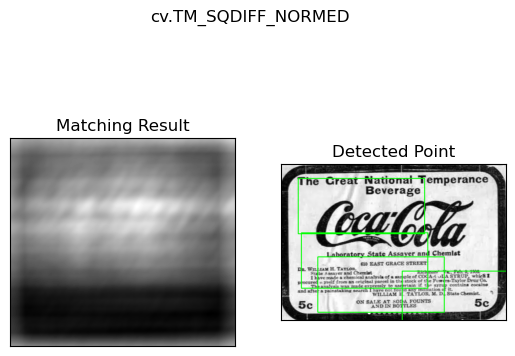

Usar la imagen ((657, 953, 3)) que es mas grande que la plantilla ((175, 400, 3))


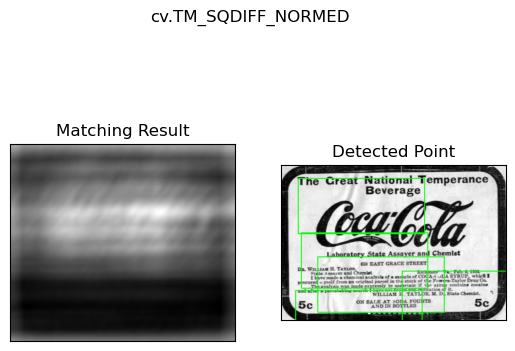

Usar la imagen ((740, 1072, 3)) que es mas grande que la plantilla ((175, 400, 3))


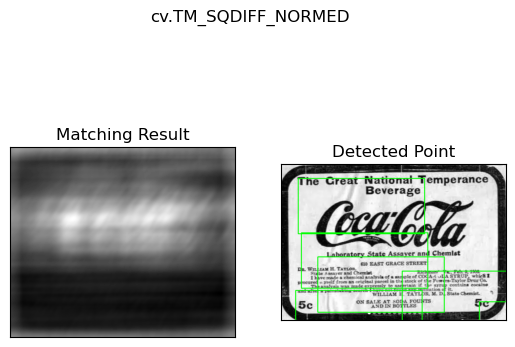

Usar la imagen ((822, 1192, 3)) que es mas grande que la plantilla ((175, 400, 3))


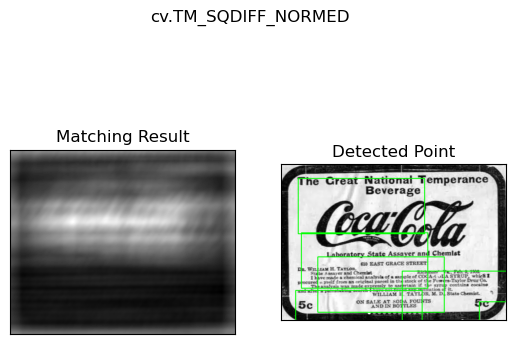

Usar la imagen ((904, 1311, 3)) que es mas grande que la plantilla ((175, 400, 3))


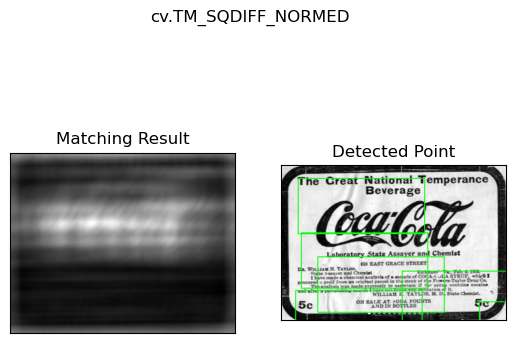

Usar la imagen ((986, 1430, 3)) que es mas grande que la plantilla ((175, 400, 3))


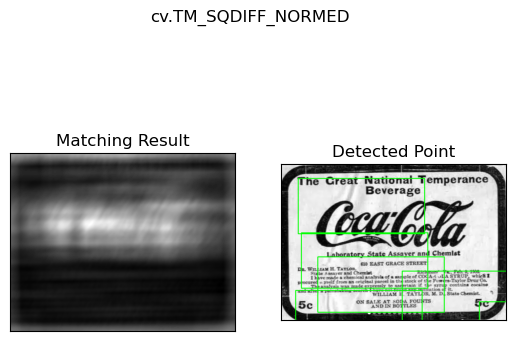

In [58]:
# Cargar la imagen y la plantilla
img_rgb = cv.imread('images/coca_retro_1.png')
template = cv.imread('template/pattern.png')

aplicar_template_a_image(img_rgb, template)